

# Dimensionality Reduction-Master Template

In this notebook, you will learn about fundamental techniques that will help us to summarize the information content of a dataset by transforming it onto a new feature subspace of lower dimensionality than the original one. Data compression is an important topic in machine learning, and it helps us to store and analyze the increasing amounts of data that are produced and collected in the modern age of technology.

In this jupyter notebook:
* Data Loading Cleaning etc are same as other notebooks
* Presented fee different techniques for Dimensionality Reduction 
* Model Development is presented is more details in the case studies. 

The details of the dimensionality Reduction Methodology from scikit Learn can be found under: 
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition  

## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Data Transformation](#3.2)  
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Principal Component Analysis](#4.1)
    * [5.2. Kernel Principal Component Analysis](#4.2)
    * [5.3. t-SNE](#4.3)
    * [5.4. Singular Value Decomposition-SVD](#4.4)

<a id='0'></a>
# 1. Introduction

Our goal in this jupyter notebook is to understand how to work through a dimensionality reduction models problem end-to-end. This notebook is applicable for all kinds of dimensionity reduction problems.

A high-dimensional dataset is a dataset that has a great number of columns (or variables). Such a dataset presents many mathematical or computational challenges. The good news is that variables (or called features) are often correlated. We can find a subset of the variables to represent the same level of information in the data, or transform the variables to a new set of variables without losing much information. Although high-power computing can somehow handle high-dimensional data, in many applications it is still necessary to reduce the dimensionality of the original data.

Principal Component Analysis (PCA) is probably the most popular technique when we think of dimension reduction. In this article I will start with PCA, then go on to introduce other dimension reduction techniques. Python code will be included in each technique.

We will look at the following Models:
1. Principal Component Analysis (PCA)
2. Kernel PCA (KPCA)
3. t-distributed Stochastic Neighbor Embedding (t-SNE)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [370]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

<a id='1.2'></a>
## 2.2. Loading the Data

In [371]:
# load dataset
dataset = read_csv('CaseStudy1-PortfolioManagement/Dow_adjcloses.csv',index_col=0)

In [372]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [373]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [374]:
# shape
dataset.shape

(4804, 30)

In [375]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,NaN,...,4.701,16.747,32.228,20.159,21.319,5.841,22.564,NaN,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,NaN,...,4.445,16.122,31.596,19.890,20.446,5.766,21.834,NaN,45.566,20.907
2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,NaN,...,4.702,16.416,31.326,20.086,20.255,5.753,22.564,NaN,44.503,21.097
2000-01-06,31.877,33.959,2.996,28.553,15.459,22.903,39.782,17.210,24.900,NaN,...,4.678,16.973,32.438,20.122,20.998,5.964,22.449,NaN,45.127,20.527
2000-01-07,32.510,34.434,3.138,29.382,15.962,23.306,42.129,18.342,24.506,NaN,...,4.678,18.123,35.024,20.922,21.831,6.663,22.283,NaN,48.535,21.052


In [376]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

MMM     float64
AXP     float64
AAPL    float64
BA      float64
CAT     float64
CVX     float64
CSCO    float64
KO      float64
DIS     float64
DWDP    float64
XOM     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
MCD     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UTX     float64
UNH     float64
VZ      float64
V       float64
WMT     float64
WBA     float64
dtype: object

In [377]:
# describe data
set_option('precision', 3)
dataset.describe()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
count,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,363.000,...,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,4804.000,2741.000,4804.000,4804.000
mean,86.769,49.659,49.107,85.482,56.697,61.735,21.653,24.984,46.368,64.897,...,23.724,20.737,49.960,55.961,62.209,64.418,27.193,53.323,50.767,41.697
std,53.942,22.564,55.020,79.085,34.663,31.714,10.074,10.611,32.733,5.768,...,20.988,7.630,19.769,34.644,32.627,62.920,11.973,37.647,17.040,19.937
min,25.140,8.713,0.828,17.463,9.247,17.566,6.842,11.699,11.018,49.090,...,2.595,8.041,16.204,13.287,14.521,5.175,11.210,9.846,30.748,17.317
25%,51.192,34.079,3.900,37.407,26.335,31.820,14.910,15.420,22.044,62.250,...,8.037,15.031,35.414,29.907,34.328,23.498,17.434,18.959,38.062,27.704
50%,63.514,42.274,23.316,58.437,53.048,56.942,18.578,20.563,29.521,66.586,...,14.147,18.643,46.735,39.824,55.715,42.924,21.556,45.207,42.782,32.706
75%,122.906,66.816,84.007,112.996,76.488,91.688,24.650,34.927,75.833,69.143,...,36.545,25.403,68.135,80.767,92.557,73.171,38.996,76.966,65.076,58.165
max,251.981,112.421,231.260,411.110,166.832,128.680,63.698,50.400,117.973,75.261,...,85.300,45.841,98.030,146.564,141.280,286.330,60.016,150.525,107.010,90.188


<a id='2.2'></a>
## 3.2. Data Visualization

Taking a look at the correlation. More detailed look at the data will be performed after implementing the Dimensionality Reduction Models.

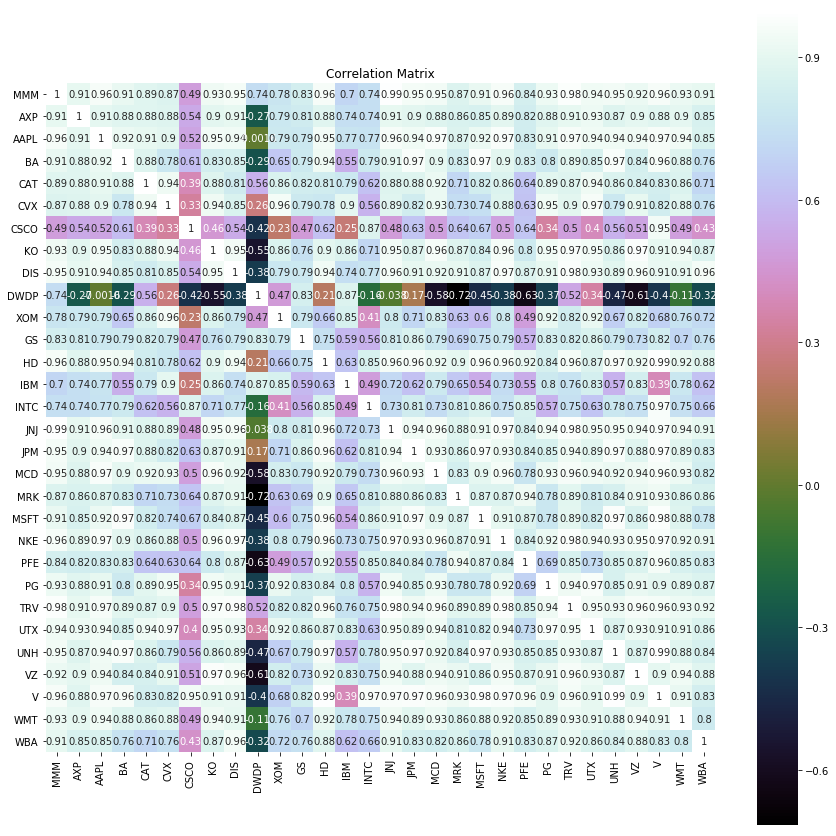

In [378]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks. 

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [379]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


Getting rid of the columns with more than 30% missing values. 

In [380]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

Given that there are null values drop the rown contianing the null values.

In [381]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')

# Drop the rows containing NA
#dataset= dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())

dataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.65,14.561,21.582,43.004,16.984,23.522,23.862,...,38.135,4.701,16.747,32.228,20.159,21.319,5.841,22.564,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.61,14.372,21.582,40.577,17.041,24.900,23.405,...,36.846,4.445,16.122,31.596,19.890,20.446,5.766,21.834,45.566,20.907


<a id='3.2'></a>
## 4.2. Data Transformation

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1.

In [382]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset)
rescaledDataset = pd.DataFrame(scaler.fit_transform(dataset),columns = dataset.columns, index = dataset.index)
# summarize transformed data
rescaledDataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-1.055,-0.629,-0.828,-0.744,-1.216,-1.266,2.120,-0.754,-0.698,-1.493,...,0.280,-0.906,-0.523,-0.897,-1.034,-1.253,-0.931,-0.387,-0.201,-1.002
2000-01-04,-1.077,-0.688,-0.834,-0.744,-1.221,-1.266,1.879,-0.749,-0.656,-1.515,...,0.221,-0.919,-0.605,-0.929,-1.041,-1.280,-0.932,-0.448,-0.305,-1.043


<a id='4'></a>
# 5. Evaluate Algorithms and Models

We will look at the following Models:
1. Principal Component Analysis (PCA)
2. Kernel PCA (KPCA)
3. t-distributed Stochastic Neighbor Embedding (t-SNE)

<a id='5.1'></a>
## 5.1. Principal Component Analysis (PCA)


The idea of principal component analysis (PCA) is to reduce the dimensionality of a dataset consisting of a large number of related variables, while retaining as much variance in the data as possible. PCA finds a set of new variables that the original variables are just their linear combinations. The new variables are called Principal Components (PCs). These principal components are orthogonal: In a 3-D case, the principal components are perpendicular to each other. X can not be represented by Y or Y cannot be presented by Z.

The cumulative plot shows a typical 'elbow' pattern that can help identify a suitable target dimensionality because it indicates that additional components add less explanatory value.

In [383]:
pca = PCA()
PrincipalComponent=pca.fit_transform(rescaledDataset)

We find that the most important factor explains around 30% of the daily return variation. The dominant factor is usually interpreted as ‘the market’, whereas the remaining factors can be interpreted as industry or style factors in line with our discussion in chapters 5 and 7, depending on the results of closer inspection (see next example). 

The plot on the right shows the cumulative explained variance and indicates that around 10 factors explain 60% of the returns of this large cross-section of stocks.  

### First Principal Component /Eigenvector

In [384]:
C[:, 0]

array([0.39148515, 0.34494961, 0.39366907, 0.3081551 , 0.3374677 ,
       0.44491906, 0.15831417, 0.44998646, 0.50053618, 0.423792  ,
       0.32663419, 0.39798274, 0.37171284, 0.27572962, 0.41386351,
       0.35459321, 0.4053205 , 0.3253392 , 0.32651492, 0.41800708,
       0.28683493, 0.38580012, 0.43312762, 0.42083697, 0.3521885 ,
       0.40078801, 0.3571515 , 0.41530262])

### Eigenvalues

In [385]:
pca.explained_variance_

array([2.35375812e+01, 1.91769936e+00, 6.96665482e-01, 6.24378183e-01,
       4.31320654e-01, 1.95226727e-01, 1.18718582e-01, 1.04179884e-01,
       7.38085672e-02, 5.06949081e-02, 4.62548761e-02, 3.96126584e-02,
       2.55200037e-02, 2.34257762e-02, 1.75389911e-02, 1.71545445e-02,
       1.48649870e-02, 1.36552429e-02, 1.01214103e-02, 8.60288882e-03,
       7.68205199e-03, 6.15718683e-03, 5.48535222e-03, 4.77565112e-03,
       4.68816377e-03, 4.44545487e-03, 2.87404688e-03, 2.69688798e-03])

### Explained Variance

,Explained Variance_Top 5
0,84.05%
1,90.89%
2,93.38%
3,95.61%
4,97.15%


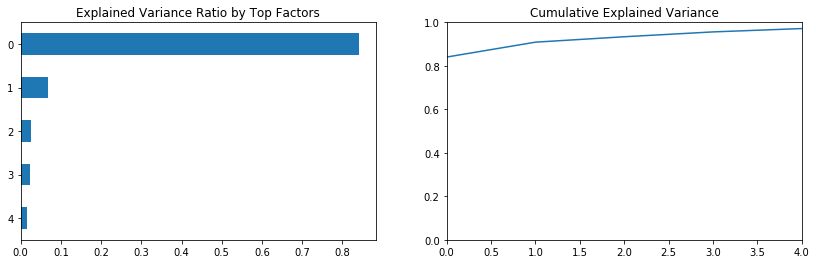

In [386]:
NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(5).style.format('{:,.2%}'.format)

### Factor Loading

Eigenvectors are unit-scaled loadings; and they are the coefficients (the cosines) of orthogonal transformation (rotation) of variables into principal components or back. Therefore it is easy to compute the components' values (not standardized) with them. Besides that their usage is limited. Eigenvector value squared has the meaning of the contribution of a variable into a pr. component; if it is high (close to 1) the component is well defined by that variable alone.

Here orthonormal eigen vectors (i.e. the term Orthonormal Eigenvectors ) provides a direction and the term Square root of (Absolute Eigen values) provide the value.

Although eigenvectors and loadings are simply two different ways to normalize coordinates of the same points representing columns (variables) of the data on a biplot, it is not a good idea to mix the two terms.

In [387]:
loadings= (pca.components_.T*np.sqrt(pca.explained_variance_)).T

### Factor loadings of the First two components

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B914E7C50>],
      dtype=object)

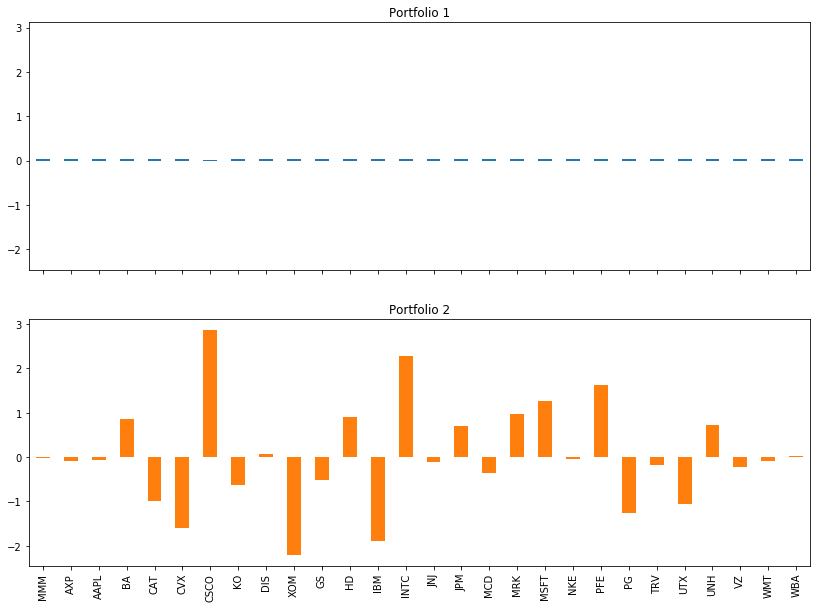

In [388]:
NumComponents=2
topPortfolios = pd.DataFrame(loadings[:NumComponents], columns=cov.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range(1, NumComponents+1)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True)

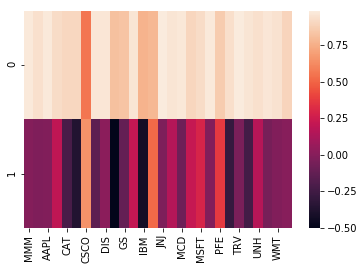

In [389]:
# plotting heatmap 
sns.heatmap(topPortfolios) 

### PCA to Reduce Dimension

In [390]:
pca2 = PCA(n_components=2)
projected_data  = pca2.fit_transform(rescaledDataset)
projected_data.shape

(4804, 2)

<a id='4.2'></a>
## 5.2. Kernel PCA (KPCA)

PCA applies linear transformation, which is just its limitation. Kernel PCA extends PCA to non-linearity. It first maps the original data to some nonlinear feature space (usually higher dimension), then applies PCA to extract the principal components in that space. But if all the dots are projected onto a 3D space, the result becomes linearly separable! We then apply PCA to separate the components.

In [391]:
kpca = KernelPCA(n_components=4, kernel='rbf', gamma=15)
kpca_transform = kpca.fit_transform(rescaledDataset)
explained_variance = np.var(kpca_transform, axis=0)
ev = explained_variance / np.sum(explained_variance)

,Explained Variance_Top 5
0,26.41%
1,25.96%
2,24.99%
3,22.64%


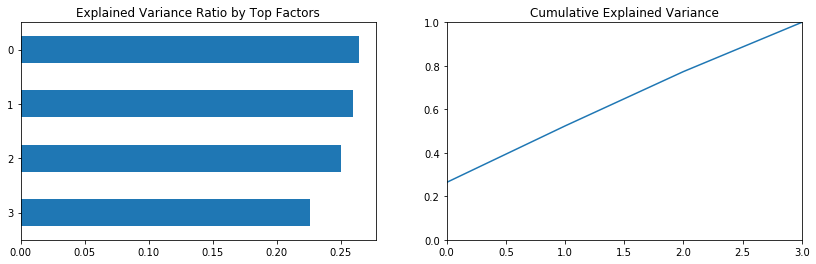

In [392]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(ev[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(ev[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');
# explained_variance
pd.Series(ev).to_frame('Explained Variance_Top 5').head(5).style.format('{:,.2%}'.format)

### Linear Discriminant Analysis (LDA)

LDA is a type of supervised learning technique. It utilizes the classes in the dependent variable to divide the space of predictors into regions. All the regions should have linear boundaries. Thus the name linear comes from. The model predicts that all observations within a region belong to the same class of the dependent variable.

Linear Discriminant Analysis also works as a dimensionality reduction algorithm, it means that it reduces the number of dimension.

The details of LDA has already been discussed in the Supervised Learning-Classification Chapter. 

<a id='4.3'></a>
## 5.3. t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE models the similarities among points. 
How does it define similarities? 
First, it is defined by the Euclidean distance between point Xi and Xj. Second, it is defined as the conditional probability that “the similarity of data point i to point j is the conditional probability p that point i would pick data j as its neighbor if other neighbors were picked according to their probabilities under a Gaussian distribution.” In the following conditional expression, if point j is closer to point i than other points, it has a higher probability (notice the negative sign) to be chosen.

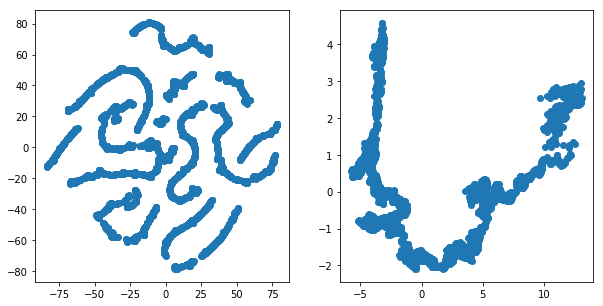

In [400]:
#t-SNE                 
X_tsne = TSNE(learning_rate=100).fit_transform(rescaledDataset)
X_pca = PCA().fit_transform(rescaledDataset)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1])

In [401]:
dfsvd = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)], index=dataset.index)
svdcols = [c for c in dfsvd.columns if c[0] == 'c']

In [402]:
dftsne = pd.DataFrame(X_tsne, columns=['x','y'], index=dfsvd.index)

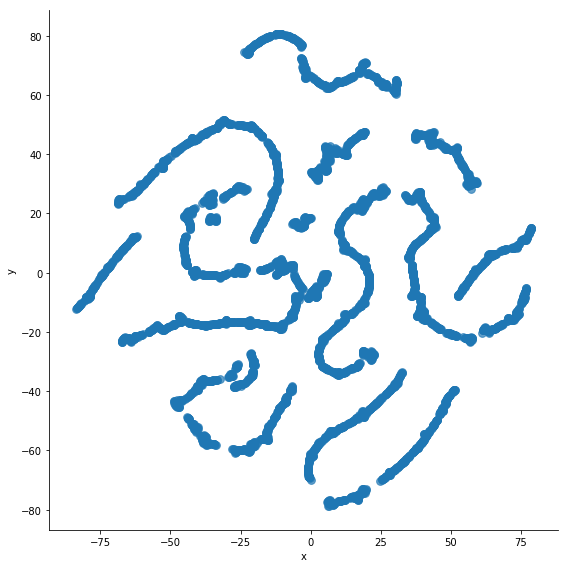

In [403]:
ax = sns.lmplot('x', 'y', dftsne, fit_reg=False, size=8
                ,scatter_kws={'alpha':0.7,'s':60})

<a id='4.4'></a>
## 5.4. Singular Value Decomposition (SVD)

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition.

We are using the TruncatedSVD method in the scikit-learn package (Truncated-SVD is a quicker calculation, and using scikit-learn is more convenient and consistent with our usage elsewhere) to transform the full dataset into a representation using the top 300 components, thus preserving variance in the data but using fewer dimensions/features to do so. This has a similar effect to Principal Component Analysis (PCA) where we represent the original data using an orthogonal set of axes rotated and aligned to the variance in the dataset.

In [397]:
ncomps = 20
svd = TruncatedSVD(ncomps)
svd_fit = svd.fit(rescaledDataset)
Y = svd.fit_transform(rescaledDataset)

,Explained Variance_Top 5
0,84.05%
1,90.89%
2,93.38%
3,95.61%
4,97.15%


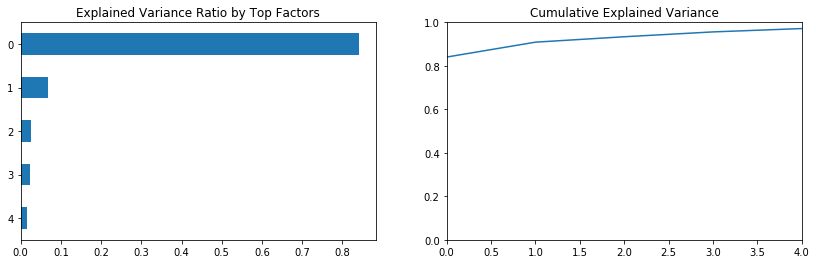

In [398]:
NumEigenvalues=5
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
pd.Series(svd_fit.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes[0]);
pd.Series(svd_fit.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance');
# explained_variance
pd.Series(np.cumsum(svd_fit.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(5).style.format('{:,.2%}'.format)

Pairs-plots are a simple representation using a set of 2D scatterplots, plotting each component against another component, and coloring the datapoints according to their classification 

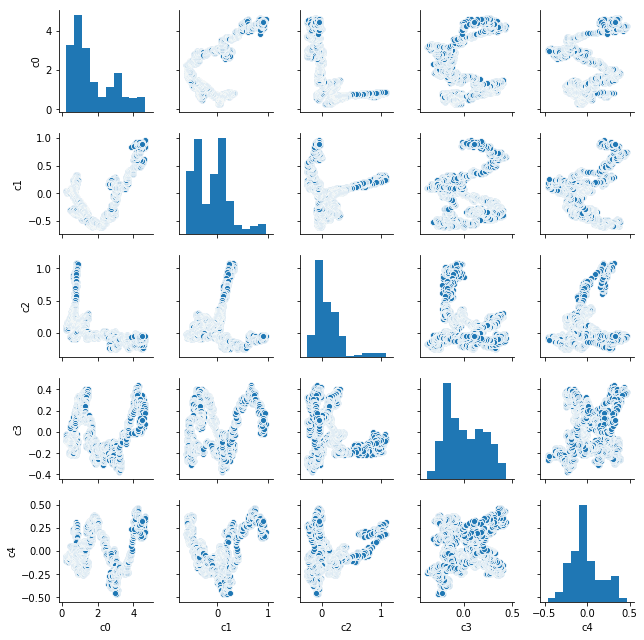

In [399]:
plotdims = 5
ploteorows = 1
dfsvdplot = dfsvd[svdcols].iloc[:,:plotdims]
#dfsvdplot['TYPEHUQ']=df['TYPEHUQ']
ax = sns.pairplot(dfsvdplot.iloc[::ploteorows,:], size=1.8)